In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv("../../archive/Ads_CTR_Optimisation.csv")

In [3]:
# Quick look on the dataset
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


- Story: The company has placed 10 similar ads. Thus, the company now wants to find info. on the best ads based on the # of times people clicked on the ads
- This example is unlike before. We either had some independent values that helped predict the outcome. Or, we had independent variables that were clustered. 
- Recall that the data will not occur. Meaning, for this problem, there's no dataset to evaulate!
- Premise: We have 10,000 users. We show them ads and try to understand if they clicked on an ad or not
- We need some strategy to find the most optimal ad to display to the user
- The info. in the dataset shows info on what the user will click but we do not have any way to predict the ad the user will click
- This model is based on the total score at the end of the program!

In [4]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = df.values[n, ad]

    total_reward = total_reward + reward
print('Random Selection (Total Rewards): {0}'.format(total_reward))


Random Selection (Total Rewards): 1271


In [7]:
# Implementing the UCB (from scratch)
# d: Total number of ads
# N: Total number of rounds
# For the first 10 rounds, the upper bound will be 1e400 (for each ad placement)     

N = 10000
d = 10
number_of_selectors = np.zeros(d)
sums_of_rewards = np.zeros(d)
total_reward = 0

ads_selectors = []

# For looping through each round (or each time a player is presented with the ad)
# Initiating the ad and max upper bound (will be using these as references)
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    
    # For looping each ads to the user (the user will pick one of the ad)
    # For the first round: There will no be selections, thus we go to the else statement
    # The upper bound becomes 1e400 and the upper bound for the first round is ad 0
    # For the second round, ad 1 is selected since ad 2 will be 0 hence it will the power of 1e4000
    # 1e4000 is a larger upper bound the for ad 0
    for i in range(0, d):
        # The mathematical concepts in calculating the upper boiund
        if (number_of_selectors[i]) > 0: 
            avg_rewards = sums_of_rewards[i] / number_of_selectors[i]
            delta_i = np.sqrt(3/2 * np.log(n+1) / number_of_selectors[i])
            upper_bound = avg_rewards + delta_i
        else:
            upper_bound = 1e400 # 10 to the power of 400
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    # Storing the ad that was selected
    ads_selectors.append(ad)
    number_of_selectors[ad] = number_of_selectors[ad] + 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [6]:
print('UCB Selection (Total Rewards): {0}'.format(total_reward))

UCB Selection (Total Rewards): 2178


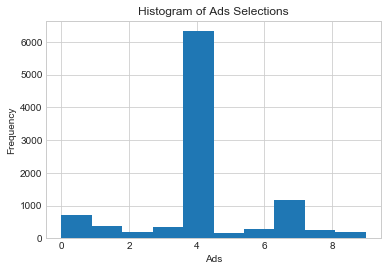

In [8]:
plt.hist(ads_selectors)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Frequency')
plt.show()